In [1]:
#### 0.그래프 그리는 데 필요한 설정

#기본 모듈
from matplotlib import pyplot as plt #for plot
import numpy as np
import pandas as pd

#데이터분석하고 연산하는 데 필요한 것들
from scipy.optimize import curve_fit, leastsq  #→ 최적화 피팅
#from tqdm import tqdm 
from scipy.stats import gaussian_kde 
import scipy as sc 
import math as math 

#그래프 폰트 크기 공통으로 설정
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


[52.52543193539678, 48.50933930698294, 37.4729902729953, 31.458338163355037, 31.233816449483086, 37.220008060181826, 49.42639982843177, 34.46882649583534, 10.704309879669964, 2.630698785494075, 1.9103319345077179, 7.314348227969462, 2.7584548029648777, 3.6366193091936365, 3.367825708079324, 3.984469851812158]


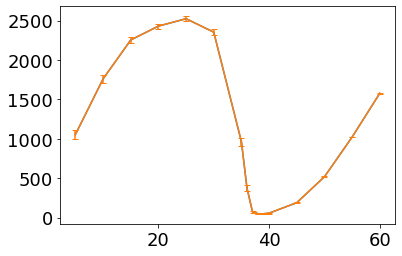

<Figure size 4000x2000 with 0 Axes>

In [2]:
#### 1. 2D XY Plot with errrorbar 

#Example
x = [5,10,15,20,25,   30,35,36,37,38,   39,40,45,50,55,   60]
y = [1054, 1760, 2254, 2430, 2524,   2353, 961.5, 374.6, 72.43, 48.22,    47.52, 55.11, 188.4, 517.3, 1021,   1577]
std = [1661, 1534, 1185, 994.8, 987.7,    1177, 1563, 1090, 338.5, 83.19,    60.41, 231.3, 87.23, 115, 106.5,  126]
Number_of_event = 1000
Number_of_bin = 16
Stat_error = [] 

for i in range(Number_of_bin):
    Stat_error.append(std[i]/pow(1000,0.5)) 

print(Stat_error)

plt.plot(x,y)
plt.errorbar(x,y,yerr=Stat_error,capsize=3)
plt.figure(figsize=(50, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.show() 

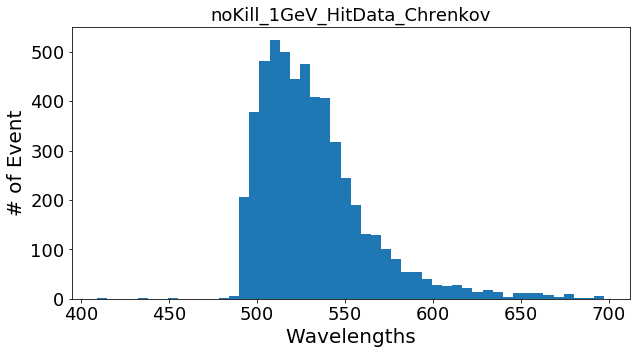

(array([  1,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   1,
          5, 207, 378, 482, 524, 499, 445, 476, 408, 406, 318, 244, 189,
        132, 129, 101,  80,  54,  54,  41,  28,  26,  28,  22,  13,  18,
         14,   4,  12,  12,  11,   8,   4,  10,   1,   1,   5]),
 array([409.025  , 414.78924, 420.55348, 426.31772, 432.08196, 437.8462 ,
        443.61044, 449.37468, 455.13892, 460.90316, 466.6674 , 472.43164,
        478.19588, 483.96012, 489.72436, 495.4886 , 501.25284, 507.01708,
        512.78132, 518.54556, 524.3098 , 530.07404, 535.83828, 541.60252,
        547.36676, 553.131  , 558.89524, 564.65948, 570.42372, 576.18796,
        581.9522 , 587.71644, 593.48068, 599.24492, 605.00916, 610.7734 ,
        616.53764, 622.30188, 628.06612, 633.83036, 639.5946 , 645.35884,
        651.12308, 656.88732, 662.65156, 668.4158 , 674.18004, 679.94428,
        685.70852, 691.47276, 697.237  ]))

In [3]:
#### 2. 1D Histogram with data extract from histogrm

def plotHist(filename, bin_num = 50):
    dataframe = pd.read_csv(filename)
    data = np.array(dataframe)
    
    counts, bins = np.histogram(data, bins = bin_num)
    
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num)
    plt.title(filename[:-4])
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
    return(counts, bins)

#Example
filename = 'noKill_1GeV_HitData_Chrenkov.txt'
plotHist(filename)


[  0   0   0   1   0   0   0   0  -1   0   0   1   0   0   0   0   1   0
   0  -1   0  -1   0   0   0   0   0   0   0  -5  -2  43  29  56  -1   5
  23  42  44  41  21  49  51  41  10  29  11  46   8  28   2  28   6   5
   7  11  18   0  -5   5   2   1  11   3   5   3   9   5  -2   1  12  -6
   0   6  -3   2   5   0   4 -11  -4  -5   0   0   5   3   5   1   2  -2
   0  -1   5  -2  -2   1  -1  -4   3  -1]
counts_3 [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 43 29 56  0  5 23 42 44 41 21 49 51 41 10 29 11 46
  8 28  2 28  6  5  7 11 18  0  0  5  2  1 11  3  5  3  9  5  0  1 12  0
  0  6  0  2  5  0  4  0  0  0  0  0  5  3  5  1  2  0  0  0  5  0  0  1
  0  0  3  0] 100


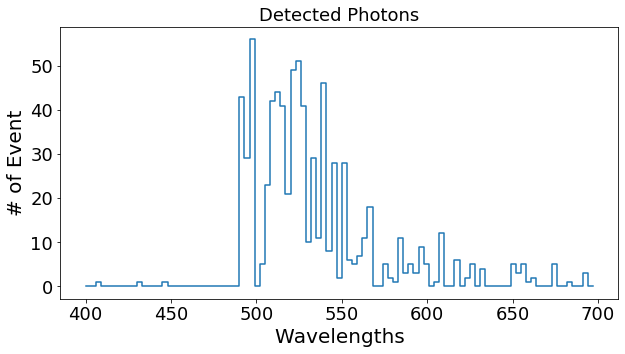

([0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  43,
  29,
  56,
  0,
  5,
  23,
  42,
  44,
  41,
  21,
  49,
  51,
  41,
  10,
  29,
  11,
  46,
  8,
  28,
  2,
  28,
  6,
  5,
  7,
  11,
  18,
  0,
  0,
  5,
  2,
  1,
  11,
  3,
  5,
  3,
  9,
  5,
  0,
  1,
  12,
  0,
  0,
  6,
  0,
  2,
  5,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  5,
  3,
  5,
  1,
  2,
  0,
  0,
  0,
  5,
  0,
  0,
  1,
  0,
  0,
  3,
  0],
 [400,
  403,
  406,
  409,
  412,
  415,
  418,
  421,
  424,
  427,
  430,
  433,
  436,
  439,
  442,
  445,
  448,
  451,
  454,
  457,
  460,
  463,
  466,
  469,
  472,
  475,
  478,
  481,
  484,
  487,
  490,
  493,
  496,
  499,
  502,
  505,
  508,
  511,
  514,
  517,
  520,
  523,
  526,
  529,
  532,
  535,
  538,
  541,
  544,
  547,
  550,
  553,
  556,
  559,
  562,
  565,
  568,
  571,
  574,
  577,
  580,
  583,
  586,
  589,
  592,
  595,
  598,
  601,
  

In [4]:
#### 3. ( 1D Histogram - 1D Histogram ) -> Step plot

def plotHist_Difference(filename_1, filename_2, bin_num = 100):
    dataframe_1 = pd.read_csv(filename_1)
    data_1 = np.array(dataframe_1)
    counts_1, bins_1 = np.histogram(data_1, bins = bin_num)
    
    dataframe_2 = pd.read_csv(filename_2)
    data_2 = np.array(dataframe_2)
    counts_2, bins_2 = np.histogram(data_2, bins = bin_num)

    counts_3 = np.array(counts_1-counts_2)
    
    # Negative -> 0
    print(counts_3)
    for i in range(len(counts_3)):
        if counts_3[i]<0:
            counts_3[i]=0
    print('counts_3',counts_3, len(counts_3))
    
    #array->list, align bin #
    counts_3_list = counts_3.tolist()
    bins_1_list = bins_1.tolist()
    bins_1_list.pop(len(bins_1_list)-1)
    
    #step plot
    plt.figure(figsize = (10,5))
    plt.step(bins_1_list,counts_3_list)
    plt.title("Detected Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
    return (counts_3_list, bins_1_list)
    
#Example
filename1 = 'noKill_1GeV_HitData_Chrenkov.txt'
filename2 = 'Kill_1GeV_HitData_Chrenkov.txt'
bin_num = range(400,703,3) # (703-400)/3-1 = 100 bins
plotHist_Difference(filename1, filename2, bin_num)

In [5]:
# 4. midBin[i] = (bins[i-1] + bins[i])/2

def midBins(bins):
    midBins = []
    for i in range(1, len(bins)):
        mid = (bins[i-1] + bins[i])/2
        midBins.append(mid)
    return midBins

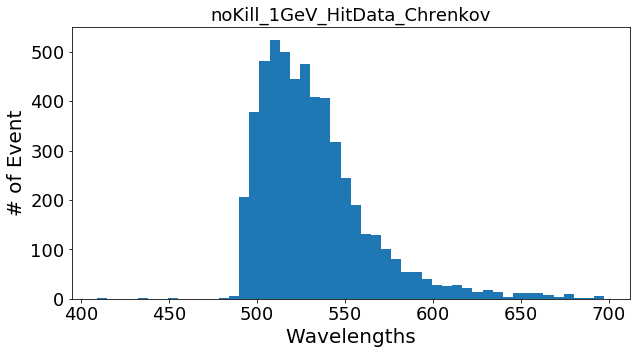

[  1   0   0   0   1   0   0   1   0   0   0   0   1   5 207 378 482 524
 499 445 476 408 406 318 244 189 132 129 101  80  54  54  41  28  26  28
  22  13  18  14   4  12  12  11   8   4  10   1   1   5] [409.025   414.78924 420.55348 426.31772 432.08196 437.8462  443.61044
 449.37468 455.13892 460.90316 466.6674  472.43164 478.19588 483.96012
 489.72436 495.4886  501.25284 507.01708 512.78132 518.54556 524.3098
 530.07404 535.83828 541.60252 547.36676 553.131   558.89524 564.65948
 570.42372 576.18796 581.9522  587.71644 593.48068 599.24492 605.00916
 610.7734  616.53764 622.30188 628.06612 633.83036 639.5946  645.35884
 651.12308 656.88732 662.65156 668.4158  674.18004 679.94428 685.70852
 691.47276 697.237  ]
[  0   0   0   1   0   0   0   0  -1   0   0   1   0   0   0   0   1   0
   0  -1   0  -1   0   0   0   0   0   0   0  -5  -2  43  29  56  -1   5
  23  42  44  41  21  49  51  41  10  29  11  46   8  28   2  28   6   5
   7  11  18   0  -5   5   2   1  11   3   5   3   9   5  -

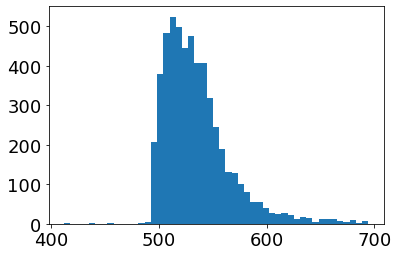

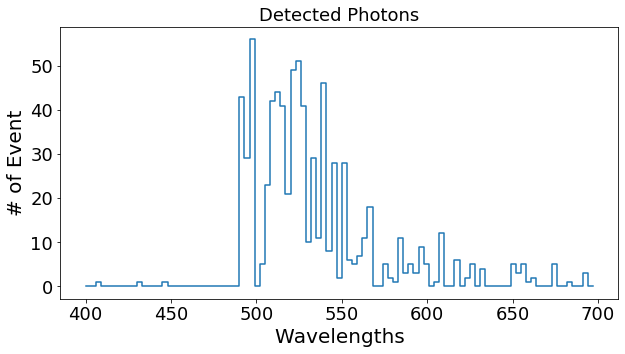

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 29, 56, 0, 5, 23, 42, 44, 41, 21, 49, 51, 41, 10, 29, 11, 46, 8, 28, 2, 28, 6, 5, 7, 11, 18, 0, 0, 5, 2, 1, 11, 3, 5, 3, 9, 5, 0, 1, 12, 0, 0, 6, 0, 2, 5, 0, 4, 0, 0, 0, 0, 0, 5, 3, 5, 1, 2, 0, 0, 0, 5, 0, 0, 1, 0, 0, 3, 0] [400, 403, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517, 520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 556, 559, 562, 565, 568, 571, 574, 577, 580, 583, 586, 589, 592, 595, 598, 601, 604, 607, 610, 613, 616, 619, 622, 625, 628, 631, 634, 637, 640, 643, 646, 649, 652, 655, 658, 661, 664, 667, 670, 673, 676, 679, 682, 685, 688, 691, 694, 697]


TypeError: cannot unpack non-iterable NoneType object

In [6]:
# 5. Count data extract from histogrm (2D possible) -> raw data for histogram ** something wrong

def Counts_to_Hist(counts, bins):
    print(counts, bins)
    tot_counts = 0
    hist_list = [] #new list with all the numbers repeated
    newBins = midBins(bins) #values of midpoints of bins
    
    #checking so code doesnt run an error 
    if len(counts) != len(newBins): 
        return 
    
    
    #populating the new hist_list
    for i in range(len(counts)):
        times = counts[i] #how many times a certain value will be added to the list 
        value = newBins[i] #what value is going to be added to the list 
        tot_counts += times #keeping track to check at the end if we have all the counts recorded
        
        if times != 0: #if it has a non zero occurance
            for i in range(times): #loop to add as many times as necessary to the new list 
                hist_list.append(value)
       
    #checking to make sure we have all the counts recorded before returning the list
    if len(hist_list) == tot_counts: 
        return (hist_list, newBins)

#Example1
filename = 'noKill_1GeV_HitData_Chrenkov.txt'
counts, bins = plotHist(filename)  
hist_list, newBins = Counts_to_Hist(counts, bins)    
plt.hist(hist_list, newBins) 

#Example2
filename1 = 'noKill_1GeV_HitData_Chrenkov.txt'
filename2 = 'Kill_1GeV_HitData_Chrenkov.txt'
bin_num = range(400,703,3) # (703-400)/3-1 = 100 bins
counts, bins = plotHist_Difference(filename1, filename2, bin_num)
hist_list, newBins = Counts_to_Hist(counts, bins)    
plt.hist(hist_list, newBins)

0eV


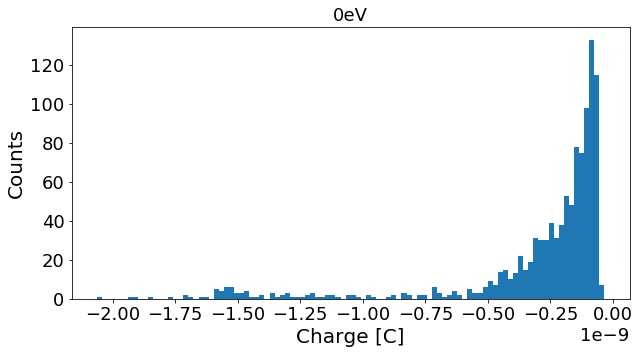

0.3eV


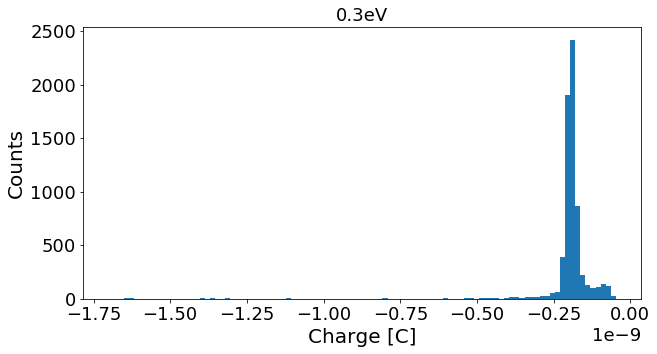

0.6eV


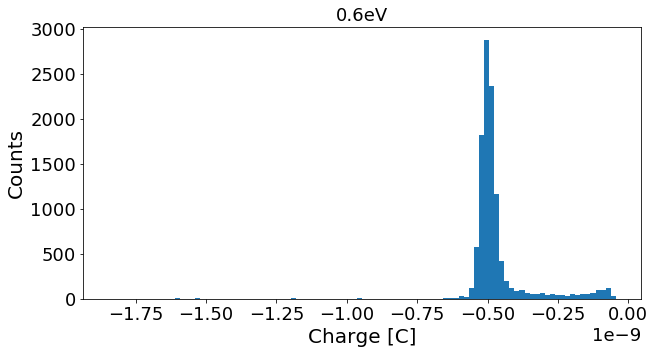

0.9eV


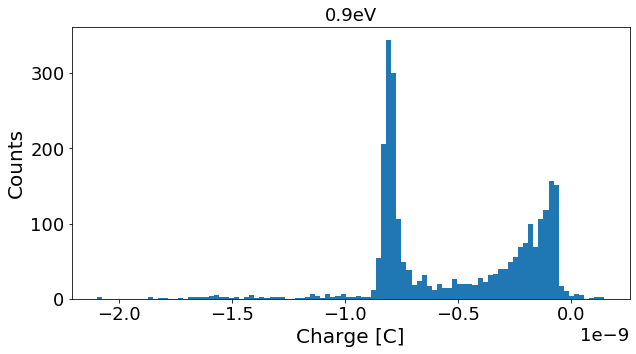

In [23]:
# 6. Direct E-Gun Data
#this is a function for the. Data comes from teh oscilliscope in Vs and this function converts to C by deviding by 50 Ohms 

ohms = 50
def VStoC(VS_data):
    C_data = [] #list of coloumb values
    for i in VS_data:
        C_data.append(i/ohms) #VS/ohm
    return C_data

#plotting a histogram quickly from the .csv file
def plotHistFromCsv(filename, bin_num = 100):
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(dataframe["Area"]) #gets the coloumn of interest
    newData = VStoC(data) #convert data from Vs --> C
    plt.figure(figsize = (10,5)) #the size of the figure
    plt.hist(newData, bins = bin_num) #plotting the hsitogram from the list of values
    plt.title(filename[:-4]) #the titles is the name of the file
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()

files = ['0eV.csv', '0.3eV.csv', '0.6eV.csv', '0.9eV.csv']

for filename in files:
    print(filename[:-4])
    df = pd.read_csv(filename) #creates a dataframe of the csv
    plotHistFromCsv(filename, 100)


0.3eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

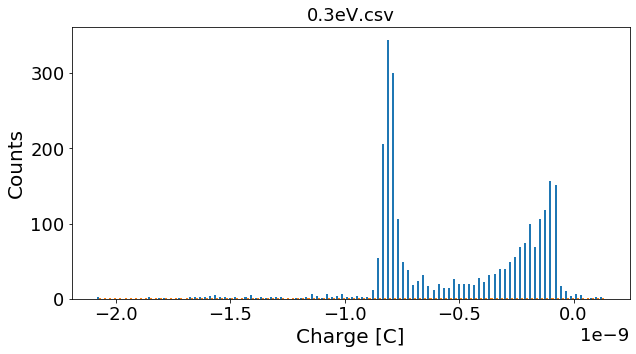

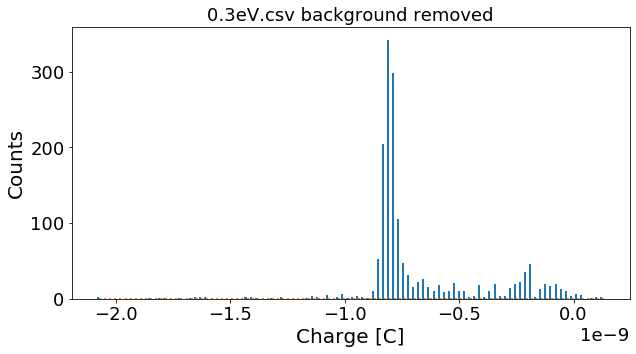

0.6eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

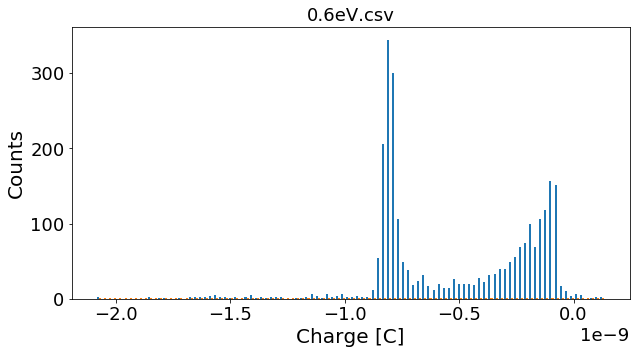

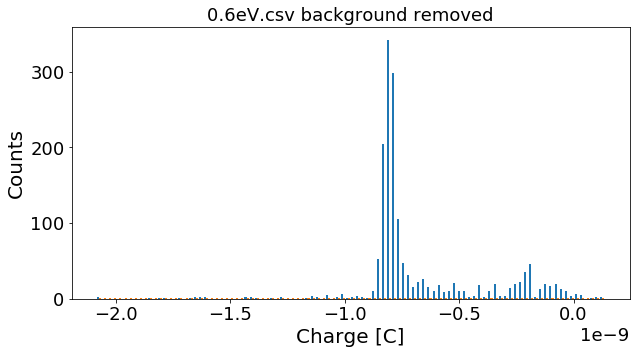

0.9eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

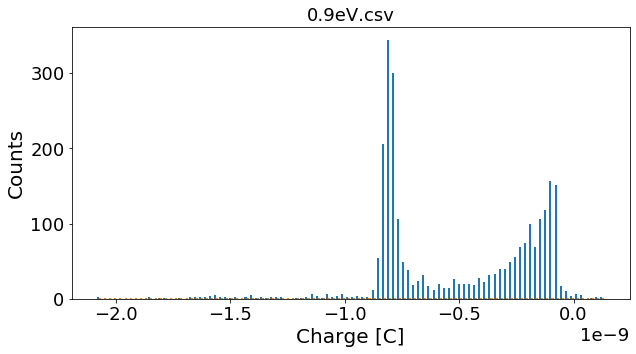

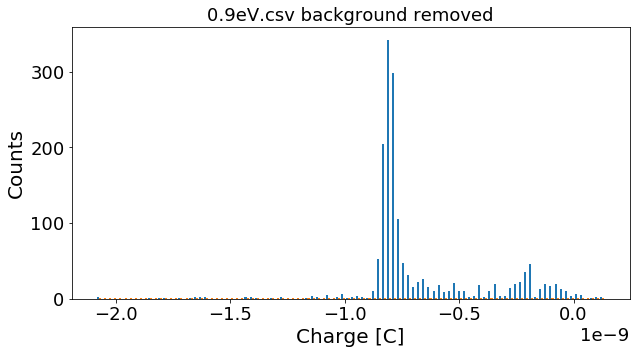

In [24]:
# 7. eV-0eV Background Removed Histogram **something wrong

def plotHist(data, filename, bin_num = 50): #name is for the title of the graph
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num) 
    plt.title(filename)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()
    
files = ['0.3eV.csv', '0.6eV.csv', '0.9eV.csv']
dataframe_0eV = pd.read_csv('0eV.csv') #creates a dataframe of the csv
data_0eV = np.array(dataframe_0eV["Area"])
C_data_0eV = VStoC(data_0eV)

for filename in files:
    print(filename[:-4])
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"])
    C_data = VStoC(data)
    
    #find minimum bin
    min_eV = min(C_data)
    min_0eV = min(C_data_0eV)
    if min_eV <= min_0eV:
        minimum = min_eV
    else:
        minimum = min_0eV
    #find maximum bin
    max_eV = max(C_data)
    max_0eV = max(C_data_0eV)
    if max_eV >= max_0eV:
        maximum = max_eV
    else:
        maximum = max_0eV
    
    #Counts list is build with fixed min and max values
    bin_num = 100
    Counts, bins = np.histogram(C_data,range=(minimum,maximum), bins=bin_num)
    Counts_0eV, bins_0eV = np.histogram(C_data_0eV,range=(minimum,maximum), bins=bin_num)
    difference = Counts - Counts_0eV
    Counts_difference = []
    
    for i in difference:
        if i >=0:
            Counts_difference.append(i)
        else:
            Counts_difference.append(0)

    #Counts list to Hist list
    Hist_data = Counts_to_Hist(Counts, bins)
    Hist_data_difference = Counts_to_Hist(Counts_difference, bins)
    
    
    plotHist(Hist_data, filename, bin_num)
    plotHist(Hist_data_difference, filename + " background removed", bin_num)
    


In [ ]:
#8. hist data -> truncated hist data

def truncated_hist_data(filename, lowlim = -10, uplim = 10):
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"]) #coloumn of interest
    C_data = VStoC(d) #this array can be used to fit a normal distribution
    truncated_data = [] #data with the lower limt applied, if nothing specified, all values will be taken 
    for i in C_data:
        if i >= lowlim and i <= uplim: #finding data within the range, in order to fit a distribution 
            #to it if necessary
            truncated_data.append(i)
    return truncated_data

In [ ]:
#9. finding the Peak, FWHM, and Eenrgy Resolution

#Standard find the index of the value given in a list
def idxFind(lst, value):
    idx = -1
    for i in range(len(lst)):
        if value == lst[i]:
            idx = i
            return idx
        
#---------------------------------------------------------------------------------------------


#finding the energy resolution from the data given with the graph x limits
def Peak_FWHM_EenrgyResolution(data, lowlim, uplim , filename,bin_num = 50):
    mean,std=norm.fit(data) #fitting the norm distribution to the data given
    x = np.linspace(lowlim, uplim, 1000) #list of nubers for x vlaues
    y = norm.pdf(x, mean, std) #applying the normal distribution to the xvalues 
    plt.figure(figsize = (10,8))
    plt.hist(data, bins = bin_num, normed = True, alpha = 0.4,color = "cornflowerblue") #plotting noramlized data
    plt.plot(x,y, c = "blue") # plot normal distribtion 
    
    
    #looking for the peak 
    peak = 0
    peak_x = 0
    ind = 0
    for i in range(len(x)):
        if y[i] >= peak:
            peak = y[i]
        else:
            peak = y[i-1] #this is the peak value, because function decreases after that in a norm function
            peak_x = x[i]
            ind =i-1 #the index of the peak value
            break #end the loop
#     plt.scatter(x[ind], y[ind], c ="R") #plot the peak value on the graph
    halfmax = peak/2
    x_hlf = np.linspace(lowlim, uplim, 1000) #another list of values
    y_hlf = [halfmax]*1000 #a list of 1000 values of the halfmax in order to plot a straight line throug the graph
#     plt.plot(x_hlf, y_hlf) #plotting the line that goes through the half max of the graph
    
    
    #now need to find the closest x value to the intercepts of the fitted normal fucntion data and the full width 
    #half max line
    firsthlf_dist = [] # list of the distances from the FWHM and that value for the first half of the norm fucntion
    sechlf_dist = [] # list of the distances from the FWHM and that value for the second half of the norm fucntion
    for i in range(len(y)):
        if i <= ind:
            firsthlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
            
        
        if i > ind:
            sechlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
            
    left_idx = idxFind(firsthlf_dist, min(firsthlf_dist)) #finding the idx of the minimum
    right_idx = idxFind(sechlf_dist, min(sechlf_dist))
            
#     plt.scatter(x[left_idx], y[left_idx], c ="g") #plotting the left intersect
    
#     plt.scatter(x[right_idx+ind], y[right_idx+ ind], c ="g") #plotting the right intersect 

    plt.title(filename)
    annot = "Peak X-value: " + "{:.2e}".format(x[ind]) #annotation for the peak xvalue to show up on the graph
    plt.annotate(annot, xy=(0.05, 0.9), xycoords='axes fraction')
    plt.xlabel("Charge [C]")
    plt.ylabel("Normalized Counts") #has to be noramlized in order to fit the function to it

    plt.show()
    
    fullwidth = abs( x[right_idx+ind]- x[left_idx]) #finding the width of the left point and the right point 
    
    

    
    
    resolution = fullwidth / peak_x #resolution = FWHM/peakXValue
    print(filename, "peak:",peak_x, "fwhm:", fullwidth, "resolution:", resolution)
    
    return abs(resolution), fullwidth, peak_x
